In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pysim import *

In [3]:
# generate data vector consisting of n number of 1s or 0s
def generate_data(n, p):
    # n: number of data points
    # p: probability of getting 1
    data = np.random.choice([0, 1], size=n, p=[1-p, p])
    return data



# seperate bit steam into inphase and quadrature phase data streams depending on even or odd
def seperate_data(data):
    # data: input data vector
    # returns inphase and quadrature phase data vectors
    inphase = data[::2]
    quadrature = data[1::2]

    inphase = np.repeat(inphase, 2)  # make the length of inphase equal to input
    quadrature = np.repeat(quadrature, 2)
    
    # convert 0s to -1s
    inphase[inphase == 0] = -1
    quadrature[quadrature == 0] = -1
    
    quadrature = np.insert(quadrature, 0, 0)  # insert 0 at the beginning of quadrature
    inphase = np.insert(inphase, len(inphase), 0) # insert 0 at the end of inphase

    return inphase, quadrature



In [5]:
def generate_msk_data(data, T, fc, fs):

    # data: input data vector
    # T: symbol duration
    # fc: carrier frequency
    # fs: sampling frequency



    inphase1, quadrature1 = seperate_data(data)

    inphase = np.zeros(len(inphase1)*int(fs*T))
    quadrature = np.zeros(len(quadrature1)*int(fs*T))
    data_test = np.zeros(len(data)*int(fs*T))

    

    t = np.linspace(-1*T, len(data)*T, (len(data)+1)*int(fs*T))
    
    for i in range(len(inphase1)):
        inphase[i*int(fs*T): (i+1)*int(fs*T)] = inphase1[i]
        quadrature[i*int(fs*T): (i+1)*int(fs*T)] = quadrature1[i]
    
    phase = np.zeros(len(data))
    for i in range(len(data)):
        phase[i] = phase[i-1] + i*np.pi/2*((data[i-1]*2-1)-(data[i]*2-1))

    t1 = t[int(fs*T):]
    phase_test = np.zeros_like(t1)
    for i in range(len(data)):
        data_test[i*int(fs*T): (i+1)*int(fs*T)] = data[i]*2-1
        phase_test[i*int(fs*T): (i+1)*int(fs*T)] = phase[i]
    

    
    # generate time vector
    #phase = np.zeros_like(t1)
    #for i in range(len(t1)):
    #    if phase[i] == phase[i-1]:
    #        phase[i] = phase[i-1] + np.pi
    #    else:
    #        phase[i] = phase[i-1]

    
        
    
    #print(phase)
    #msk = inphase*np.cos(np.pi*t/(2*T))*np.cos(2*np.pi*fc*t) + quadrature*np.sin(np.pi*t/(2*T))*np.sin(2*np.pi*fc*t)
    #msk = inphase*np.sin(np.pi*t/(2*T))*np.sin(2*np.pi*fc*t) + quadrature*np.cos(np.pi*t/(2*T))*np.cos(2*np.pi*fc*t)
    #msk = np.cos(2*np.pi*fc*t+(-inphase*quadrature)*np.pi*t/(2*T) - 1/2*np.pi*(inphase-1))
    msk = np.cos(phase_test)*np.cos(np.pi*t1/(2*T))*np.cos(2*np.pi*fc*t1) - data_test*np.cos(phase_test)*np.sin(np.pi*t1/(2*T))*np.sin(2*np.pi*fc*t1)

    fig, axs = plt.subplots(7,figsize=(9,7),  sharey=True, sharex=True)

    axs[0].plot(t1/T, np.cos(phase_test))
    axs[0].set_title('Inphase data')
    

    axs[1].plot(t1/T, -data_test*np.cos(phase_test))
    axs[1].set_title('Quadrature data')
    

    axs[2].plot(t1/T, np.cos(phase_test)*np.cos(np.pi*t1/(2*T)))
    axs[2].set_title('Inphase signal')
    

    axs[3].plot(t1/T, data_test*np.cos(phase_test)*np.sin(np.pi*t1/(2*T)))
    axs[3].set_title('Quadrature signal')
    

    axs[4].plot(t1/T, np.cos(phase_test)*np.cos(np.pi*t1/(2*T))*np.cos(2*np.pi*fc*t1) )
    axs[4].set_title('Inphase signal modulated')
    

    axs[5].plot(t1/T, data_test*np.cos(phase_test)*np.sin(np.pi*t1/(2*T))*np.sin(2*np.pi*fc*t1))
    axs[5].set_title('Quadrature signal modulated')
    

    #axs[6].plot(t[int(T*fs):-int(T*fs)]/T, msk[int(T*fs):-int(T*fs)])
    axs[6].plot(t1/T, msk)
    axs[6].set_title('MSK signal')
    

    x_labels = ['0', 'T', '2T', '3T', '4T', '5T', '6T', '7T', '8T']
    for i in range(7):
        axs[i].set_xticks(np.arange(0, len(data)+1, 1))
        axs[i].set_xticklabels(x_labels)

    axs[6].set_xlabel('t')

    for j in range(7):
        for i in range(1, int(len(data))):
            axs[j].axvline(x=i*T*10, color='black', linestyle='--', alpha=0.5)
    

    plt.tight_layout()
    plt.savefig('figures/theory/oqpsk_msk.pdf')


    return msk, t




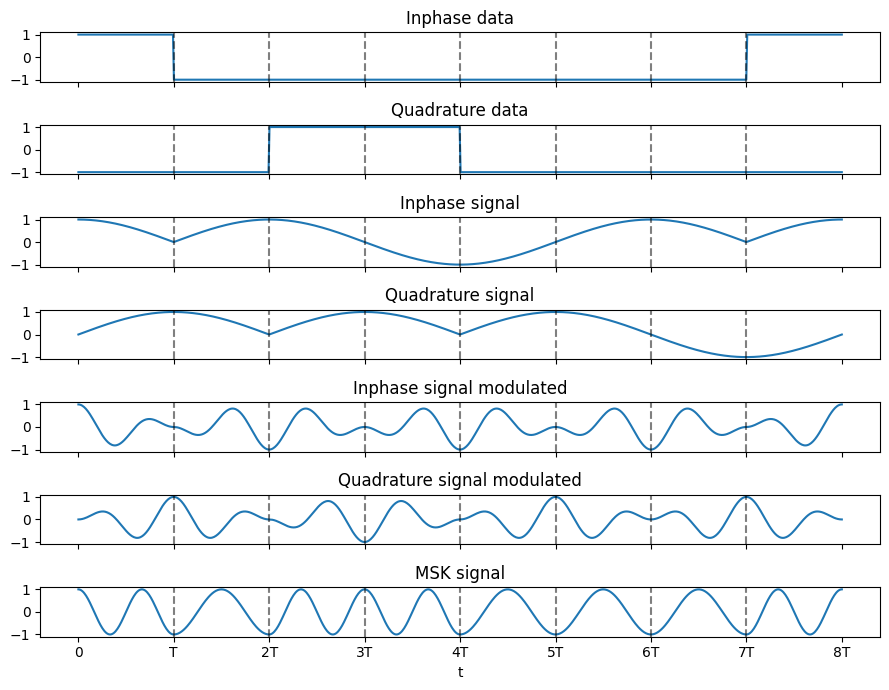

In [6]:
data = np.array([1, 1, 0, 0, 0, 1, 1, 1])
#data = np.array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0])
data = np.array([1, 0, 1, 1, 0, 0, 0, 1])
T = 0.1
fc = 1/T*1.25
#fc = 10
fs = 1000
N = 10

msk, t = generate_msk_data(data, T, fc, fs)

#plt.plot(t, msk)

[1 1 0 0 0 1 1 1]
[ 1  1 -1 -1 -1 -1  1  1  0]
[ 0  1  1 -1 -1  1  1  1  1]
1
1
-1
-1
-1
-1
1
1
0
(900,)
(700,)


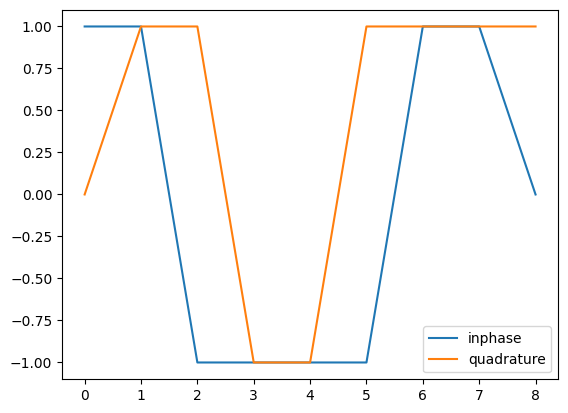

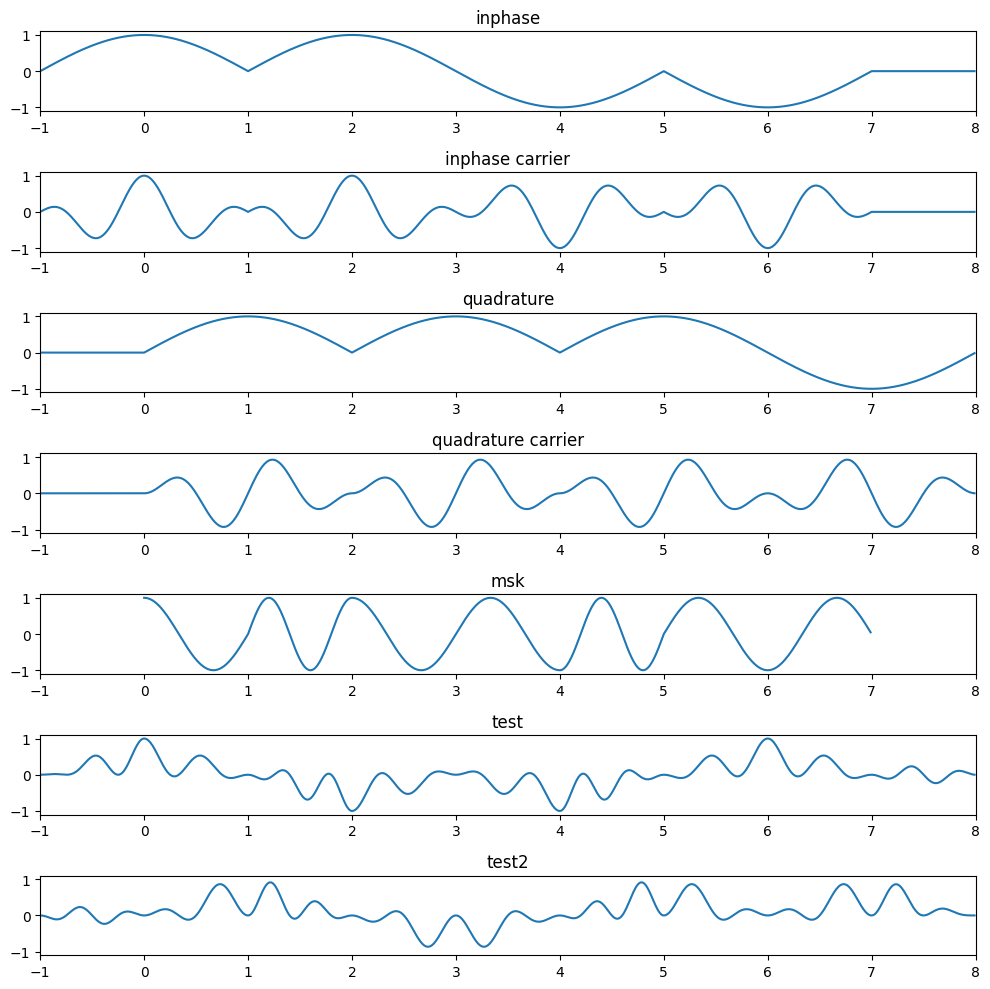

In [16]:
def generate_msk_data_plot(n, p, T, fc, fs):
    # n: number of data points
    # p: probability of getting 1
    # T: symbol duration
    # fc: carrier frequency
    # fs: sampling frequency
    data = generate_data(n, p) # generate random data
    data = np.array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])
    data = np.array([0, 1, 0, 0, 1, 0, 0, 0])
    data = np.array([1, 1, 0, 0, 0, 1, 1, 1])
    
    inphase, quadrature = seperate_data(data)
    t = np.arange(-1*T, (n)*T, 1/fs)
    msk_data = np.zeros(len(t))
    msk_inphase = np.zeros(len(t))
    msk_inphase_carrier = np.zeros(len(t))
    msk_quadrature = np.zeros(len(t))
    msk_quadrature_carrier = np.zeros(len(t))
    demod_in = np.zeros(len(t))
    demod_qu = np.zeros(len(t))
    print(data)
    print(inphase)
    print(quadrature)
    
    for i in range(len(data)+1):
        print(inphase[i])
        msk_data[i*int(T*fs):(i+1)*int(T*fs)] = inphase[i]*np.cos(np.pi/(2*T)*t[i*int(T*fs):(i+1)*int(T*fs)])*np.cos(2*np.pi*fc*t[i*int(T*fs):(i+1)*int(T*fs)]) + \
                                                    quadrature[i]*np.sin(np.pi/(2*T)*t[i*int(T*fs):(i+1)*int(T*fs)])*np.sin(2*np.pi*fc*t[i*int(T*fs):(i+1)*int(T*fs)])
        
        msk_inphase[i*int(T*fs):(i+1)*int(T*fs)] = inphase[i]*      np.cos(np.pi/(2*T)*t[i*int(T*fs):(i+1)*int(T*fs)])#*np.cos(2*np.pi*fc*t[i*int(T*fs):(i+1)*int(T*fs)])
        msk_inphase_carrier[i*int(T*fs):(i+1)*int(T*fs)] = inphase[i]*np.cos(2*np.pi*fc*t[i*int(T*fs):(i+1)*int(T*fs)])*np.cos(np.pi/(2*T)*t[i*int(T*fs):(i+1)*int(T*fs)])

        msk_quadrature[i*int(T*fs):(i+1)*int(T*fs)] = quadrature[i]*np.sin(np.pi/(2*T)*t[i*int(T*fs):(i+1)*int(T*fs)])#*np.sin(2*np.pi*fc*t[i*int(T*fs):(i+1)*int(T*fs)]) 
        msk_quadrature_carrier[i*int(T*fs):(i+1)*int(T*fs)] = quadrature[i]*np.sin(2*np.pi*fc*t[i*int(T*fs):(i+1)*int(T*fs)])*np.sin(np.pi/(2*T)*t[i*int(T*fs):(i+1)*int(T*fs)])

        demod_in[i*int(T*fs):(i+1)*int(T*fs)] = msk_data[i*int(T*fs):(i+1)*int(T*fs)]*np.cos(2*np.pi*fc*t[i*int(T*fs):(i+1)*int(T*fs)])*np.cos(np.pi/(2*T)*t[i*int(T*fs):(i+1)*int(T*fs)])
        demod_qu[i*int(T*fs):(i+1)*int(T*fs)] = msk_data[i*int(T*fs):(i+1)*int(T*fs)]*np.sin(2*np.pi*fc*t[i*int(T*fs):(i+1)*int(T*fs)])*np.sin(np.pi/(2*T)*t[i*int(T*fs):(i+1)*int(T*fs)])
    return msk_data, t, msk_inphase, msk_quadrature, demod_in, demod_qu, msk_inphase_carrier, msk_quadrature_carrier
T = 0.1
fc = 1/T*1.25
fc = 10
fs = 1000
N = 8
msk_data, t, msk_inphase, msk_quadrature, demod_in,demod_qu,  msk_inphase_carrier, msk_quadrature_carrier = generate_msk_data_plot(N, 0.5, T, fc, fs)

#plt.figure(figsize=(12,6))
fig, axs = plt.subplots(7,figsize=(10,10),  sharey=True)


axs[0].plot(t/0.1, msk_inphase, label='inphase')
axs[0].set_title('inphase')
axs[0].set_xlim(-1, N)
axs[1].plot(t/0.1, msk_inphase_carrier, label='inphase carrier')
axs[1].set_title('inphase carrier')
axs[1].set_xlim(-1, N)
axs[2].plot(t/0.1, msk_quadrature, label='quadrature')
axs[2].set_title('quadrature')
axs[2].set_xlim(-1, N)
axs[3].plot(t/0.1, msk_quadrature_carrier, label='quadrature carrier')
axs[3].set_title('quadrature carrier')
axs[3].set_xlim(-1, N)
axs[4].plot(t[int(T*fs):(N)*int(T*fs)]/0.1, msk_data[int(T*fs):(N)*int(T*fs)], label='msk')
axs[4].set_title('msk')
axs[4].set_xlim(-1, N)
axs[5].plot(t/0.1, demod_in, label='Demodulated inphase')
axs[5].set_title('test')
axs[5].set_xlim(-1, N)
axs[6].plot(t/0.1, demod_qu, label='Demodulated quadrature')
axs[6].set_title('test2')
axs[6].set_xlim(-1, N)

plt.tight_layout()
print(t.shape)
print(t[int(T*fs):(N)*int(T*fs)].shape)

# demodulation

[  99.9998459  -99.9998459 -100.000154    99.9998459]
[100.000154   -99.9998459   99.9998459   99.99999995]
99.99984590472324
-99.99984590472323
-100.00015400020132
99.99984590472323


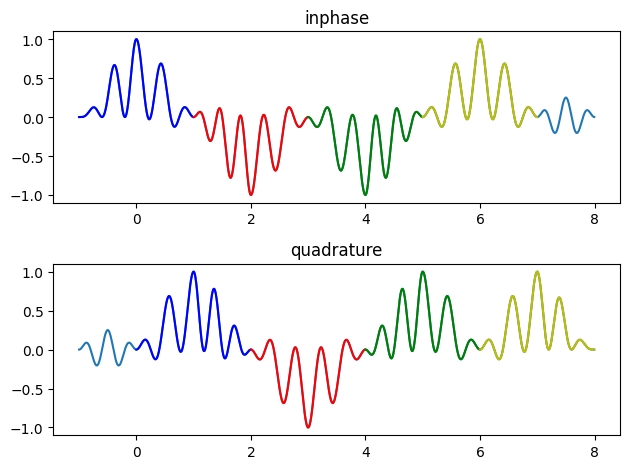

In [10]:
inphase, quadrature, t = msk_demodulation(msk_data, T, fc, fs)

inphase_int, quadrature_int = integrate_data(inphase, quadrature, T, fs,)
print(inphase_int)
print(quadrature_int)
fig, axs = plt.subplots(2, sharey=True)
axs[0].plot(t/T, inphase, label='inphase')
axs[0].plot(t[0*2*int(T*fs):(0*2+2)*int(T*fs)]/T,inphase[0*2*int(T*fs):(0*2+2)*int(T*fs)], color='b')
axs[0].plot(t[1*2*int(T*fs):(1*2+2)*int(T*fs)]/T,inphase[1*2*int(T*fs):(1*2+2)*int(T*fs)], color='r')
axs[0].plot(t[2*2*int(T*fs):(2*2+2)*int(T*fs)]/T,inphase[2*2*int(T*fs):(2*2+2)*int(T*fs)], color='g')
axs[0].plot(t[3*2*int(T*fs):(3*2+2)*int(T*fs)]/T,inphase[3*2*int(T*fs):(3*2+2)*int(T*fs)], color='y')
axs[0].set_title('inphase')
axs[1].plot(t/T,quadrature, label='quadrature')
axs[1].plot(t[(0*2+1)*int(T*fs):(0*2+3)*int(T*fs)]/T,quadrature[(0*2+1)*int(T*fs):(0*2+3)*int(T*fs)], color='b')
axs[1].plot(t[(1*2+1)*int(T*fs):(1*2+3)*int(T*fs)]/T,quadrature[(1*2+1)*int(T*fs):(1*2+3)*int(T*fs)], color='r')
axs[1].plot(t[(2*2+1)*int(T*fs):(2*2+3)*int(T*fs)]/T,quadrature[(2*2+1)*int(T*fs):(2*2+3)*int(T*fs)], color='g')
axs[1].plot(t[(3*2+1)*int(T*fs):(3*2+3)*int(T*fs)]/T,quadrature[(3*2+1)*int(T*fs):(3*2+3)*int(T*fs)], color='y')
axs[1].set_title('quadrature')
plt.tight_layout()

print(np.trapz(inphase[0*int(T*fs):(0+2)*int(T*fs)]))
print(np.trapz(inphase[2*int(T*fs):(2+2)*int(T*fs)]))
print(np.trapz(inphase[4*int(T*fs):(4+2)*int(T*fs)]))
print(np.trapz(inphase[6*int(T*fs):(6+2)*int(T*fs)]))

# test modulation and demodulation

In [11]:
N = 100
T = 0.1
T = 1/200
fc = 19.60e3
fs = 4e6

msk_data, t, data_input = generate_msk_data(N, 0.5, T, fc, fs)
# add noise to the data
msk_data = msk_data + np.random.normal(0, 50, len(msk_data))

inphase, quadrature, t = msk_demodulation(msk_data, T, fc, fs)

inphase_int, quadrature_int = integrate_data(inphase, quadrature, T, fs)

inphase_data = treshold_decision(inphase_int)
quadrature_data = treshold_decision(quadrature_int)

data_output = combine_data(inphase_data, quadrature_data)


# compare input and output data
print(data_input)


print(data_output)

print(np.array_equal(data_input, data_output))

equals = 0
for i in range(len(data_input)):
    if data_input[i] == data_output[i]:
        equals += 1
print("out of ", len(data_input), " bits ", equals, " are equal")

[0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1]
[0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1]
False
out of  100  bits  98  are equal


# Phase plot

([<matplotlib.axis.YTick at 0x14c72d46110>,
 [Text(0, -10, '−10'),
  Text(0, -9, '−9'),
  Text(0, -8, '−8'),
  Text(0, -7, '−7'),
  Text(0, -6, '−6'),
  Text(0, -5, '−5'),
  Text(0, -4, '−4'),
  Text(0, -3, '−3'),
  Text(0, -2, '−2'),
  Text(0, -1, '−1'),
  Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9')])

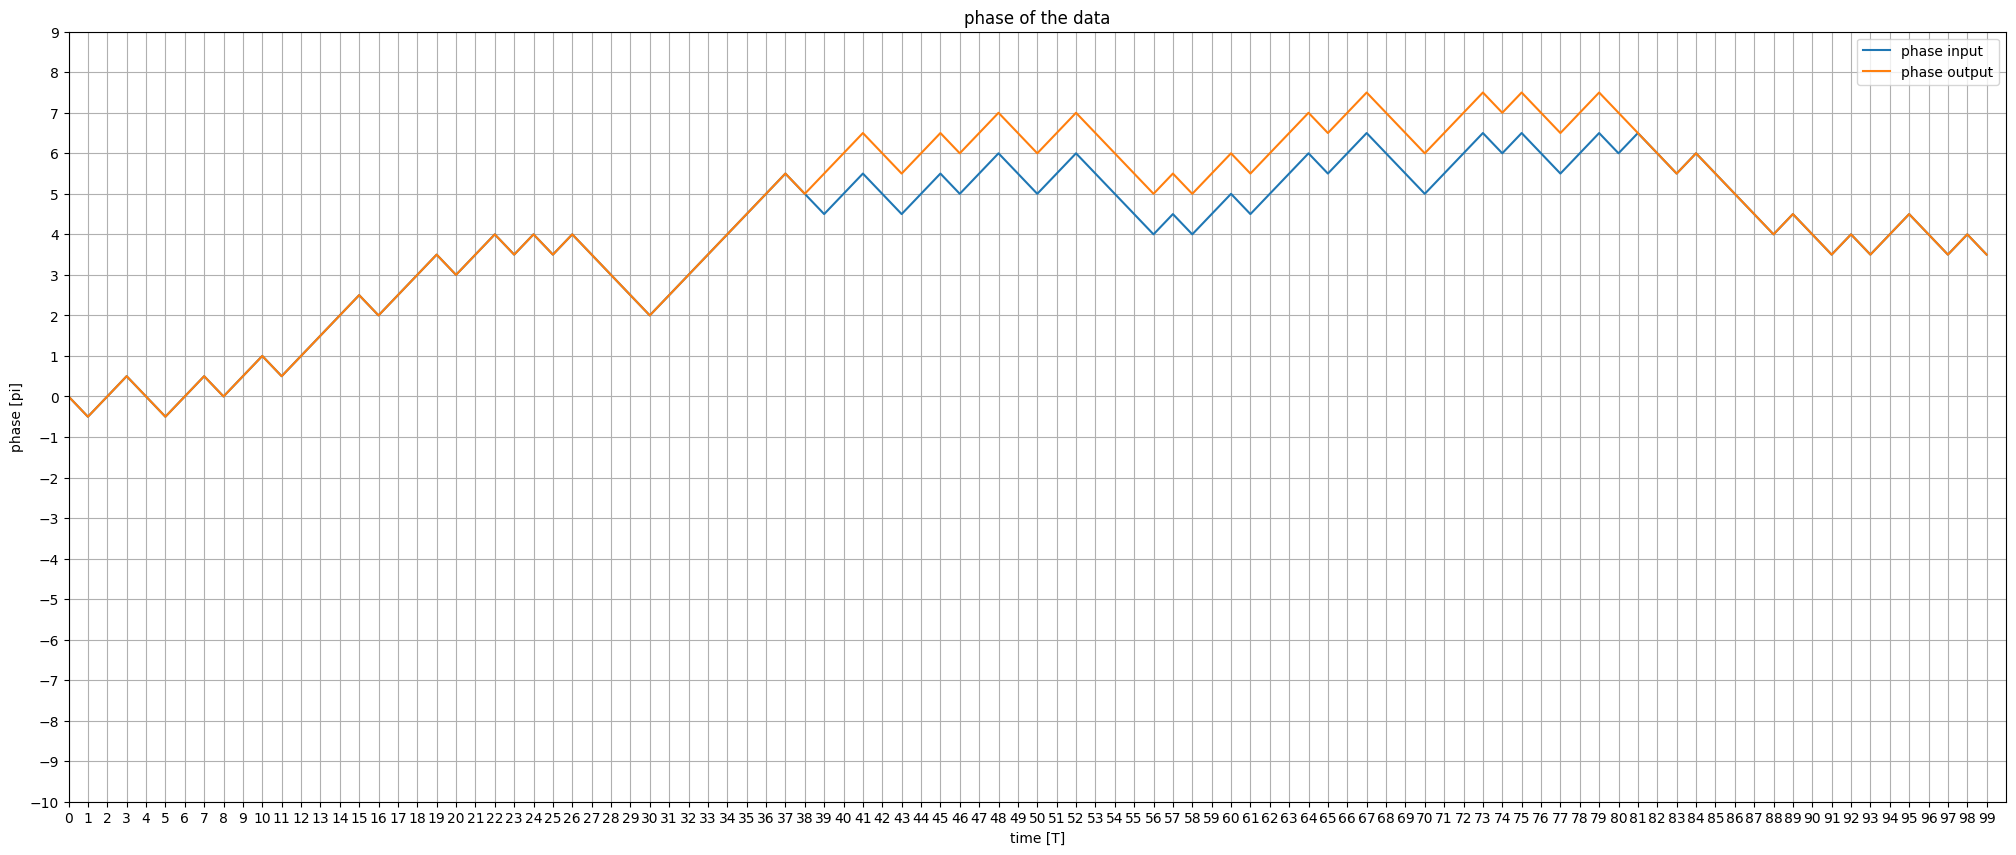

In [12]:
t = np.arange(0, N*T, T)
data_input = 2*data_input-1
data_output = 2*data_output-1
phase = np.zeros(len(data_input))
phase2 = np.zeros(len(data_output))
for i in range(len(data_input)):
    phase[i] = np.pi/2*(np.sum(data_input[0:i])) #% (2*np.pi)

for i in range(1,len(data_output)):
    phase2[i] = (phase2[i-1] + np.pi/2*data_output[i-1] ) #% (2*np.pi)

plt.figure(figsize=(25,10))
plt.plot(t/T, phase/np.pi, label='phase input')
plt.plot(t/T, phase2/np.pi, label='phase output')
plt.title('phase of the data')
plt.xlabel('time [T]')
plt.ylabel('phase [pi]')
plt.grid()
plt.legend()
plt.xlim(0,N)
#plt.ylim(-1,1)
# set xticks
plt.xticks(np.arange(0, N, 1))
plt.yticks(np.arange(-10, 10, 1))

# FFT plot to see noise

ValueError: x and y must have same first dimension, but have shapes (100,) and (2020000,)

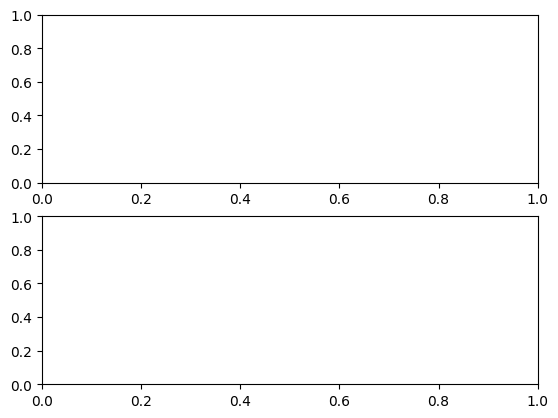

In [13]:
## fft of the msk signal

f, Pxx_den = signal.periodogram(msk_data, fs)
fig, axs = plt.subplots(2)
axs[0].plot(t, msk_data)
axs[0].set_title('msk data')

axs[1].semilogy(f/1e3, Pxx_den)
axs[1].set_xlabel('frequency [kHz]')
axs[1].set_ylabel('PSD [V**2/Hz]')
axs[1].set_ylim([1e-7, 1e-1])
axs[1].set_xlim([0, 100])

([<matplotlib.axis.XTick at 0x14c00caf950>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

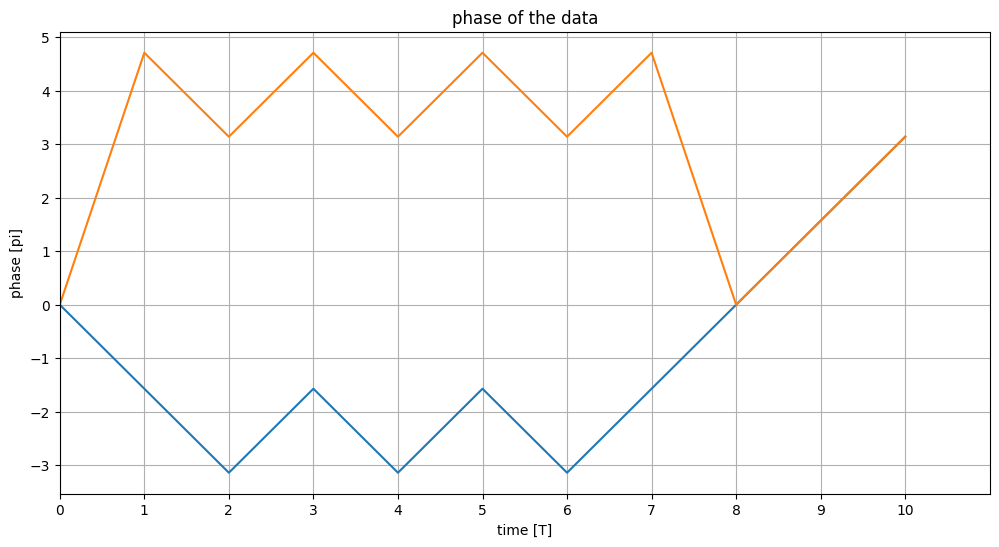

In [16]:
# generate random data 
N = 11
T = 0.1
fc = 20
fs = 2000
data = generate_data(N, 0.5)
# convert 0 to -1

#data = np.array([1,0,1,1,0,1,1,1,0,0,0])
data = 2*data-1

t = np.arange(0, N*T, T)
# calculate the phase of the data
phase = np.zeros(len(data))
phase2 = np.zeros(len(data))
for i in range(len(data)):
    phase[i] = np.pi/2*(np.sum(data[0:i])) #% (2*np.pi)

for i in range(1,len(data)):
    phase2[i] = (phase2[i-1] + np.pi/2*data[i-1] ) % (2*np.pi)

plt.figure(figsize=(12,6))
plt.plot(t/T, phase, label='phase')
plt.plot(t/T, phase2, label='phase2')
plt.title('phase of the data')
plt.xlabel('time [T]')
plt.ylabel('phase [pi]')
plt.grid()
plt.xlim(0,N)
#plt.ylim(-1,1)
# set xticks
plt.xticks(np.arange(0, N, 1))